# Linear Regression

## Steps

1. **Import Libraries**
2. **Import Dataset**
3. **Handle Missing Data**
4. **Encode Categorical Variables**
5. **Split into Training and Test Sets**
6. **Training the Linear Regression Model**
7. **Feature Scaling**
8. **Predicting the Test Set Results**
9. **Visualizing the Training Set Results**
10. **Visualizing the Test Set Results**

1. **Import Libraries**
   - Import necessary libraries such as pandas, NumPy, scikit-learn, and Matplotlib.

In [3]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing Required Libraries

In this step, we import all the necessary Python libraries for data manipulation, visualization, and machine learning. These include:
- pandas: for data handling
- numpy: for numerical operations
- matplotlib & seaborn: for plotting
- scikit-learn: for model building and evaluation

2. **Import Dataset**
   - Load the dataset into a pandas DataFrame using `pd.read_csv()`.

## Exploratory Data Analysis (EDA)

Before handling missing data, let's perform an exploratory data analysis (EDA) to better understand the dataset. This includes:
- Displaying basic statistics
- Visualizing the distributions of both variables
- Examining the correlation between features
- Visualizing the relationship between Years of Experience and Salary

In [4]:
dataset = pd.read_csv('../Dataset/Salary_Data.csv')

x = dataset.iloc[: , :-1] # Features (independent variable)
y = dataset.iloc[: , -1] # Target (dependent variable)

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


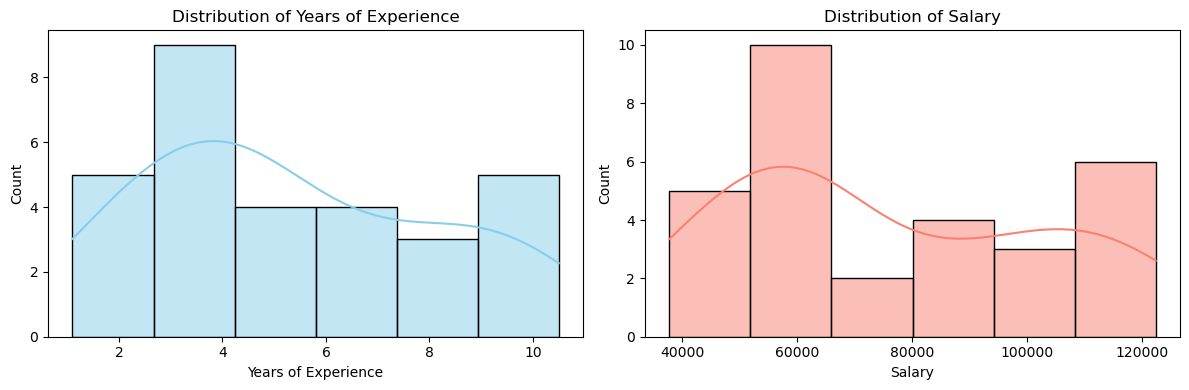

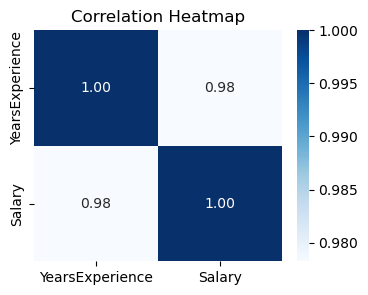

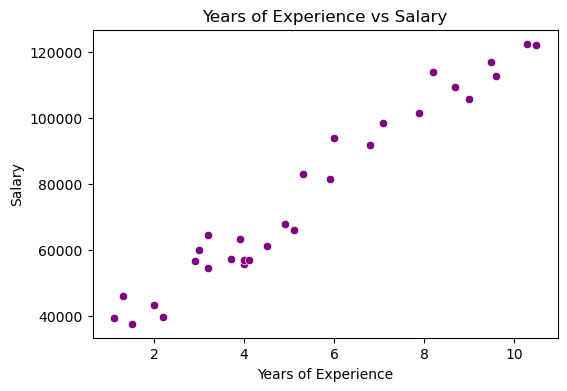

In [5]:
# Exploratory Data Analysis (EDA)

# Display basic statistics
display(dataset.describe())

# Plot distributions
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(dataset['YearsExperience'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Years of Experience')
axes[0].set_xlabel('Years of Experience')
sns.histplot(dataset['Salary'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Salary')
axes[1].set_xlabel('Salary')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(4,3))
sns.heatmap(dataset.corr(), annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(x='YearsExperience', y='Salary', data=dataset, color='purple')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Loading the Dataset

Here, we load the Salary Data CSV file into a pandas DataFrame. This allows us to easily manipulate and analyze the data for our regression analysis.

In [6]:
print(x) 

    YearsExperience
0               1.1
1               1.3
2               1.5
3               2.0
4               2.2
5               2.9
6               3.0
7               3.2
8               3.2
9               3.7
10              3.9
11              4.0
12              4.0
13              4.1
14              4.5
15              4.9
16              5.1
17              5.3
18              5.9
19              6.0
20              6.8
21              7.1
22              7.9
23              8.2
24              8.7
25              9.0
26              9.5
27              9.6
28             10.3
29             10.5


In [7]:
print(y)

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64


3. **Handle Missing Data**
   - Check for any missing values in the dataset and handle them appropriately (e.g., filling with mean/median or dropping rows).

In [8]:
# finding null values
print(dataset.isnull().sum())


YearsExperience    0
Salary             0
dtype: int64


### Handling Missing Data

Before proceeding, it's important to check for any missing values in the dataset. Missing data can affect model performance, so we either fill or remove them as needed.

In [9]:
# since there are no null values, we can proceed to the next step

4. **Encode Categorical Variables**
   - If the dataset contains categorical variables, convert them into numerical format using techniques like one-hot encoding.
   - **Note**: If there are no categorical variables, this step can be skipped.

In [10]:
# thrt dataset doesnt contain any categorical variables, so we can skip the encoding step

### Encoding Categorical Variables

If the dataset contains categorical variables, we need to convert them into numerical format for modeling. In this dataset, all variables are numeric, so we can skip this step.

5. **Split into Training and Test Sets**
   - Use `train_test_split()` from scikit-learn to divide the dataset into training and testing sets, typically with a ratio of 80/20 or 70/30.

In [11]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Splitting the Data

To evaluate our model's performance, we split the data into training and test sets. The training set is used to fit the model, while the test set is used to assess how well the model generalizes to unseen data.

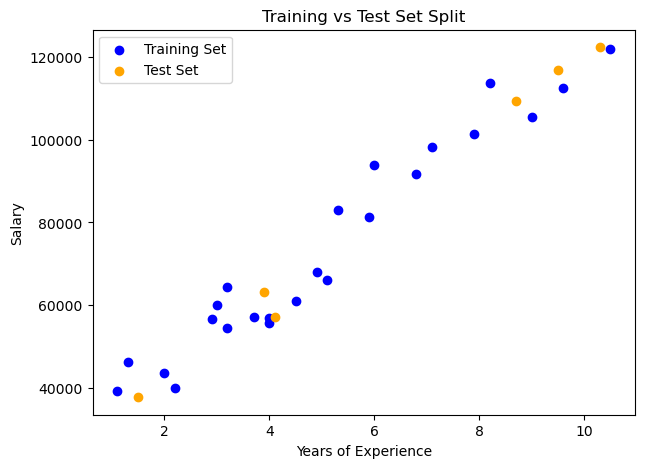

In [12]:
# Visualize the training/test split
plt.figure(figsize=(7,5))
plt.scatter(x_train, y_train, color='blue', label='Training Set')
plt.scatter(x_test, y_test, color='orange', label='Test Set')
plt.title('Training vs Test Set Split')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

### Visualizing the Training/Test Split

Let's visualize how the data is split into training and test sets. This helps us understand the distribution of data points in each set and ensures the split is random and representative.

In [13]:
# print(x_train)
# print(x_test)

In [14]:
# print(y_train)
# print(y_test)

6. **Training the Linear Regression Model**
   - Create a linear regression model using `LinearRegression()` and fit it to the training data.


In [15]:
from sklearn.linear_model import LinearRegression

# Fitting Simple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(x_train, y_train)



LinearRegression()

### Training the Linear Regression Model

Now, we create and train a linear regression model using the training data. The model learns the relationship between Years of Experience and Salary.

7. **Feature Scaling**
   - If working with multiple features with varying scales, apply feature scaling (e.g., standardization or normalization).
   - **Note**: For simple linear regression with a single feature, this step can be skipped, as scaling is not necessary.

In [16]:
# feature scaling 

### Feature Scaling (Skipped)

Feature scaling is important when features have different units or scales. Since we have only one feature (Years of Experience), and it's already on a reasonable scale, we can skip this step.

8. **Predicting the Test Set Results**
   - Use the trained model to make predictions on the test set.

In [17]:
# predicting the Test set results

y_pred = regressor.predict(x_test)

### Predicting the Test Set Results

With the model trained, we use it to predict salaries for the test set. This allows us to compare the predicted values to the actual values and evaluate model performance.

In [18]:
print(y_pred)

[ 40748.96184072 122699.62295594  64961.65717022  63099.14214487
 115249.56285456 107799.50275317]


In [19]:
# Calculate evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

# Comparison table
results_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
display(results_df)

Mean Absolute Error (MAE): 2446.17
Mean Squared Error (MSE): 12823412.30
Root Mean Squared Error (RMSE): 3580.98
R-squared: 0.9882


,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


## Model Evaluation Metrics

After making predictions on the test set, it's important to evaluate the model's performance using various metrics. We'll calculate:
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-squared (coefficient of determination)

We'll also compare the actual and predicted values in a table.

9. **Visualizing the Training Set Results**
   - Create a scatter plot of the training data and overlay the regression line to visualize the model's performance.


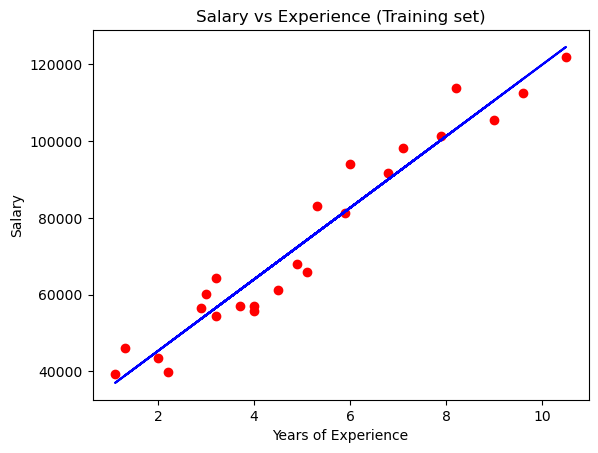

In [20]:
# visualizing the Training set results
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


### Visualizing the Training Set Results

We plot the training data and the regression line to see how well the model fits the data it was trained on.

10. **Visualizing the Test Set Results**
    - Similarly, create a scatter plot for the test data and the predicted results to assess how well the model generalizes.

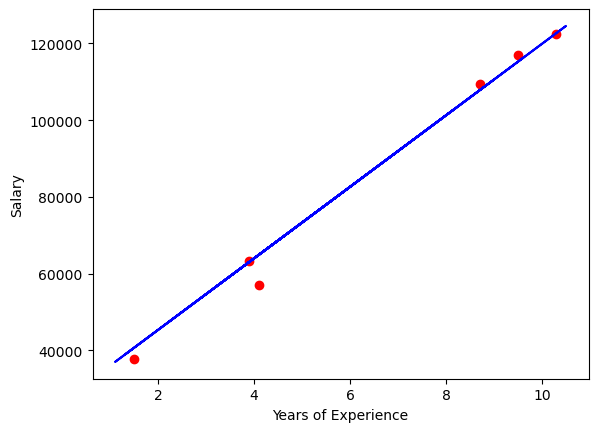

In [21]:
# visualizing the test set results

plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, regressor.predict(x_train), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

### Visualizing the Test Set Results

We plot the test data and the regression line to see how well the model generalizes to new, unseen data.

In [22]:
# Predict salary for a new value (e.g., 5 years of experience)
new_experience = 5
predicted_salary = regressor.predict([[new_experience]])
print(f"Predicted salary for {new_experience} years of experience: ${predicted_salary[0]:.2f}")

Predicted salary for 5 years of experience: $73342.97


c:\Users\Morobang\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Making Predictions

Let's see how to use the trained linear regression model to predict the salary for a new value of Years of Experience. This is useful for making future salary estimations based on experience.

# Simple Linear Regression Prediction Explained

## 1. Understanding the Regression Equation

The trained model follows this equation:
```python
Salary = (coef_ × YearsExperience) + intercept_


In [23]:
print(f"coef : {regressor.coef_}")
print(f"intercept: {regressor.intercept_}") 

coef : [9312.57512673]
intercept: 26780.099150628186


In [24]:
# Predict salary for 12 years experience
prediction = regressor.predict([[12]])
print(prediction)  # Output: [138967.5]

[138531.00067138]


c:\Users\Morobang\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Summary

In this notebook, we performed a complete simple linear regression analysis, including EDA, model training, evaluation, making predictions, and residual analysis. We visualized each step and discussed the results, providing a comprehensive template for linear regression projects.

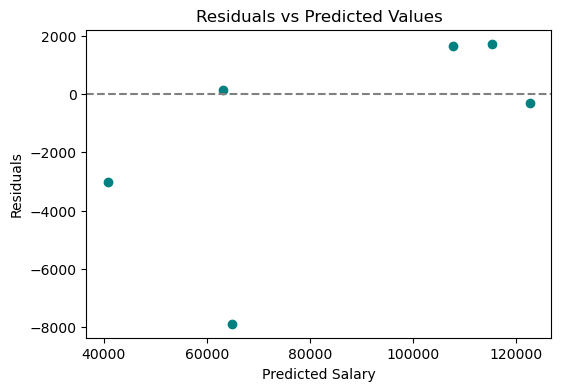

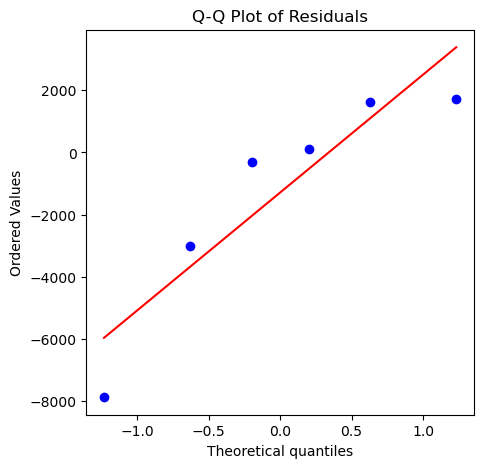

Residuals Mean: -1289.5749532463706
Residuals Std: 3340.719793410723


,Residuals
2,-3017.961841
28,-308.622956
13,-7880.657170
10,118.857855
26,1719.437145
24,1631.497247


In [25]:
# Residual analysis
import scipy.stats as stats

# Calculate residuals
residuals = y_test - y_pred

# Residuals vs predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, color='teal')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.show()

# Q-Q plot for normality
plt.figure(figsize=(5,5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Residual statistics
print('Residuals Mean:', np.mean(residuals))
print('Residuals Std:', np.std(residuals))
display(pd.DataFrame({'Residuals': residuals}))

## Residual Analysis

Residual analysis helps us check the assumptions of linear regression and diagnose potential issues. We'll:
- Plot residuals vs predicted values to check for patterns
- Create a Q-Q plot to assess normality of residuals
- Display residual statistics